# Visualize images for documentation


In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random

---
- Dictionary prepartion
---

In [2]:
sourceDirCrop = '/Volumes/SanDiskSSD/BFH_backup/CAS_PML/Project/DeepFashion/dataCropSQ/Img/'
#sourceDirOrig = '/Volumes/SanDiskSSD/BFH_backup/CAS_PML/Project/DeepFashion/data/Img'
#sourceAnnoDir = '/Volumes/SanDiskSSD/BFH_backup/CAS_PML/Project/DeepFashion/data/Anno/'
sourceAnnoDir = '../data/Anno/'
sourceDirOrig = '../data/Img/'

In [3]:
with open(os.path.join(sourceAnnoDir,'list_category_cloth.txt'),'r') as fp:
    lines = [ l.rstrip().replace('1','upper') \
                        .replace('2','lower') \
                        .replace('3','full').split() for l in fp][2:]  
    mainCatagories = { l[0]:l[1] for l in lines}

In [4]:
with open(os.path.join(sourceAnnoDir,'list_bbox.txt'),'r') as fp:
    lines = [l.rstrip('\n').split() for l in fp][2:]
    bbox_dict = { l[0]: [int(l[1]),int(l[2]),int(l[3]),int(l[4]) ] for l in lines}

In [5]:
#neutralize the bbox keys
bbox_dict = { '/'.join(k.split('/')[-2:]):v for k,v in bbox_dict.items() }

In [6]:
classDict = {}
for d,_,files in os.walk(sourceDirOrig,topdown=False):
    cl_name = d.split('_')[-1]
    if mainCatagories.get(cl_name) is None: continue
    if classDict.get(cl_name) is None: classDict[cl_name] = []
    classDict[cl_name].extend([ d + '/' + f for f in files \
                                   if not f.startswith('.') or not f.endswith('.jpg') ])

# clean out some old classes which were ignored
bunkKeys = []
for cl_name in mainCatagories.keys():
    if classDict.get(cl_name) is None: bunkKeys.append(cl_name)
        
# can't do it in one step, because you're modifing the object you're working on
for b in bunkKeys:
    mainCatagories.pop(b,None)

In [7]:
# neutralize the directory names
for cl_name,files in classDict.items():
    classDict[cl_name] = [ '/'.join(f.split('/')[-2:]) for f in files]

In [8]:
# a catagory dict for random selection of catagory
catDict = {}
for cl_name,ct_name in mainCatagories.items():
    if catDict.get(ct_name) is None: catDict[ct_name] = []
    catDict[ct_name].extend(classDict[cl_name])

---
- make random sample of classes
---

In [9]:
selectSize = 9
random.seed(1234)
selectCat = { ct_name:random.sample(catDict[ct_name],k=selectSize) for ct_name in catDict.keys()}

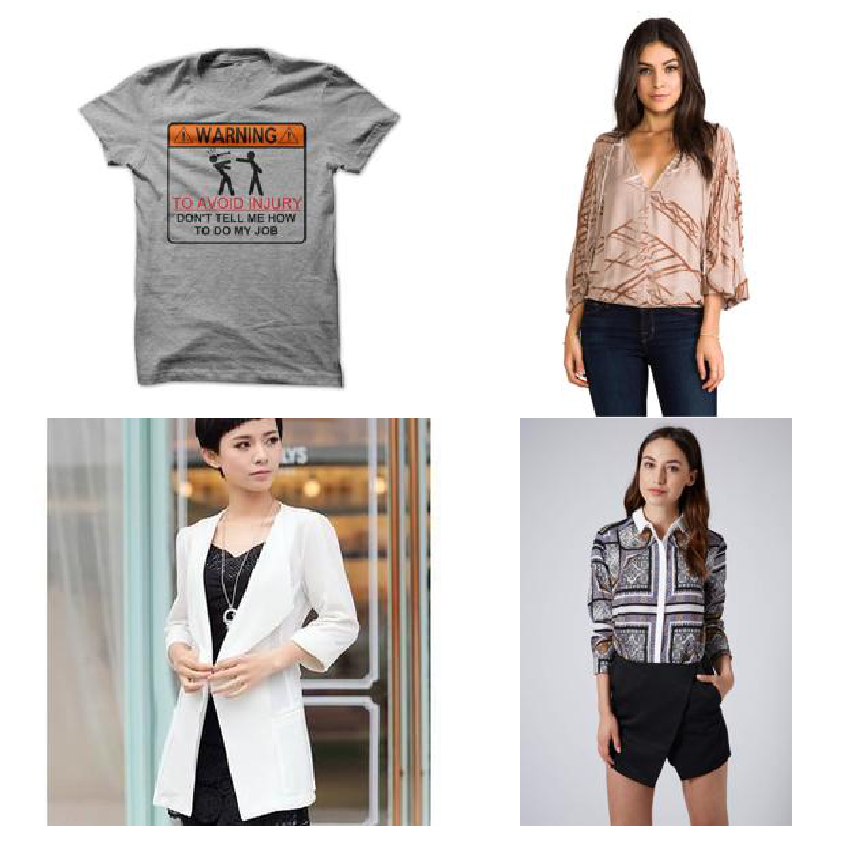

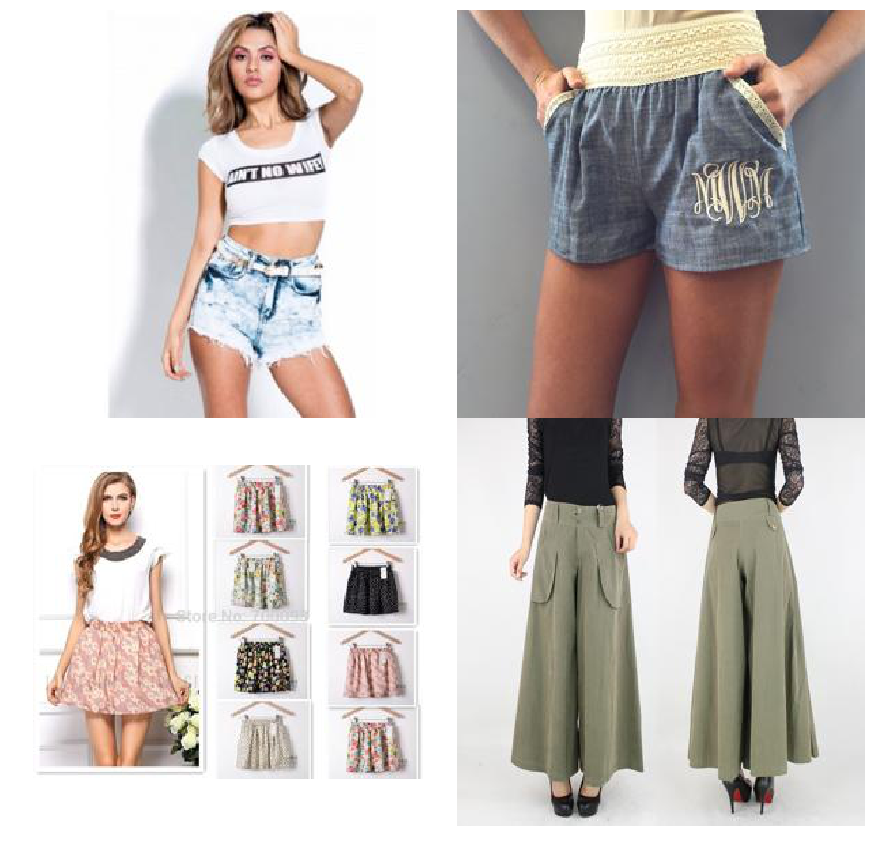

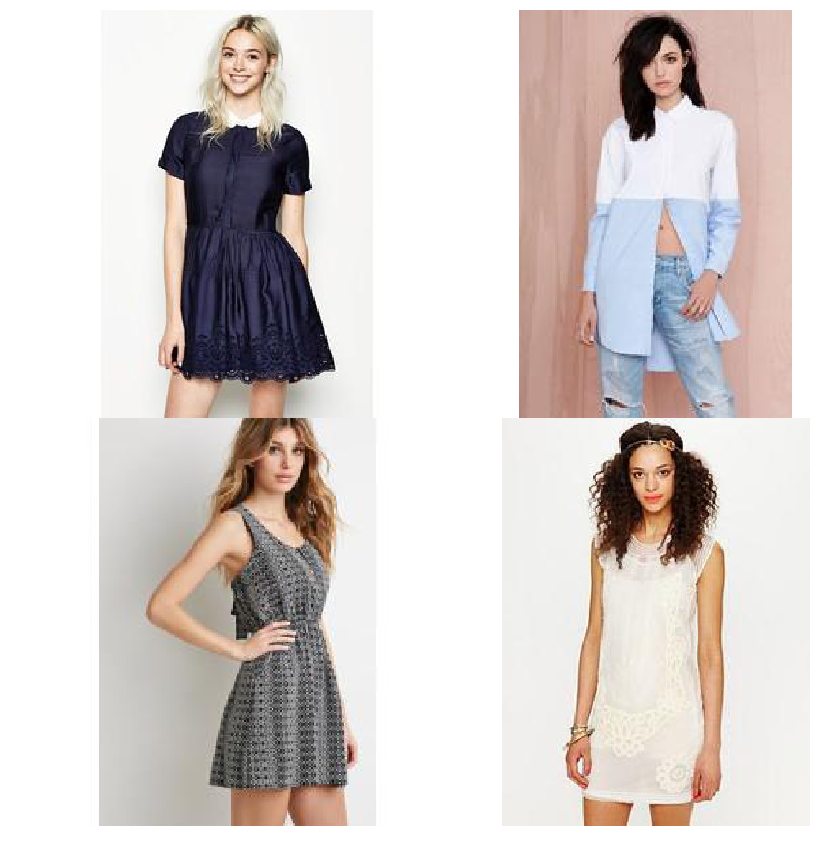

In [10]:
for ct_name,imgs in selectCat.items():
    fig = plt.figure(figsize=(15,15))
    ax = [plt.subplot(2,2,i+1) for i in range(4)]
    plt.subplots_adjust(wspace=0,hspace=0)
    for axi,imgf in zip(ax,imgs):
        axi.set_axis_off()
        img = plt.imread(os.path.join(sourceDirOrig,imgf))
        axi.imshow(img)
    plt.subplots_adjust(wspace=0,hspace=0)
    plt.savefig(f"./example_{ct_name}.jpg",bbox_inches='tight')
    plt.show()      